In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd  # To play sound in the notebook
from sklearn.model_selection import train_test_split
from sklearn import tree

#### Part1: Explore data.

#### What is our project and why are we doing it?
We have 3 phases, namely, "Shut Up", "Are you kidding me?", and "Are you serious?". We want to create some models for each of these phrases to identify whether they are in negative, neutral, or positive tone. Some of the models are just numeric and then we use common ML algorithms such as Decision Trees for classification. Other models such as MFCC create an m*n visual based on frequency of data. We then use a computer vision algorithm to classify the images. Finally, we'll compare the results based on cross validation, and run the model on some unknown dataset that is our own voice, to see how the model will do on.

#### How did we get the data? 
We used Youglish website to search for labels and manually labeled them. 

#### Part1.1 Loading, data exploration, and seeing the distributions.

#### Exploring Shut Up data. 

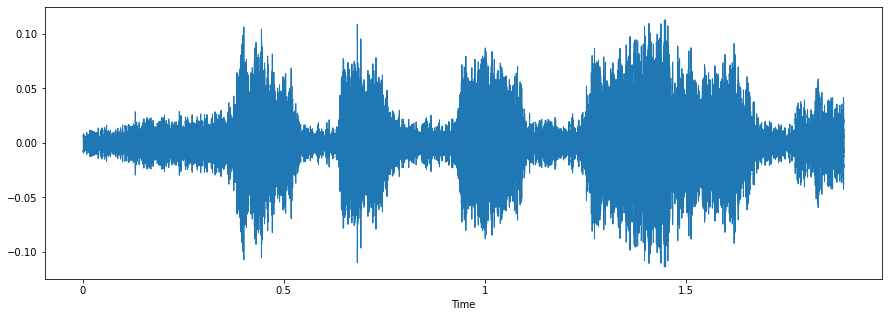

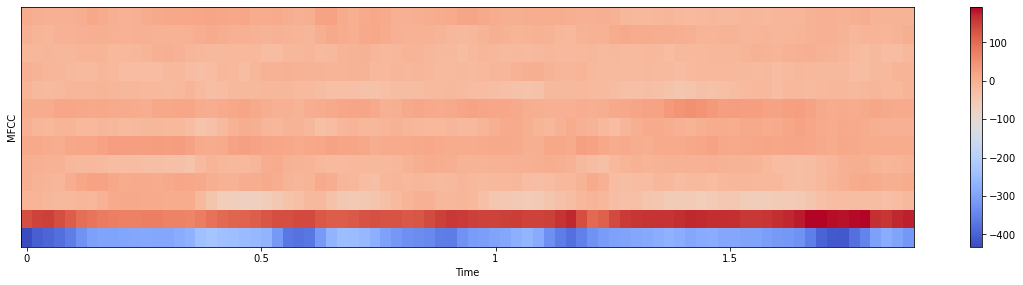

In [2]:
neg7 = "Shut Up/neg7.wav"
# Load files
data, sampling_rate = librosa.load(neg7)
plt.figure(figsize=(15, 5))

#Display
librosa.display.waveshow(data, sr=sampling_rate)

# MFCC plot
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')

plt.colorbar()
# Lets play the audio 
ipd.Audio(neg7)

So that is a negative example. The speech is clear and not too noisy, so good data quality. We can't understand anything special from the plot other the fact that we have some variation in sound which means we are on the right track. The audio file is about 2 seconds which is long enough for saying a phrase in a sentence.  

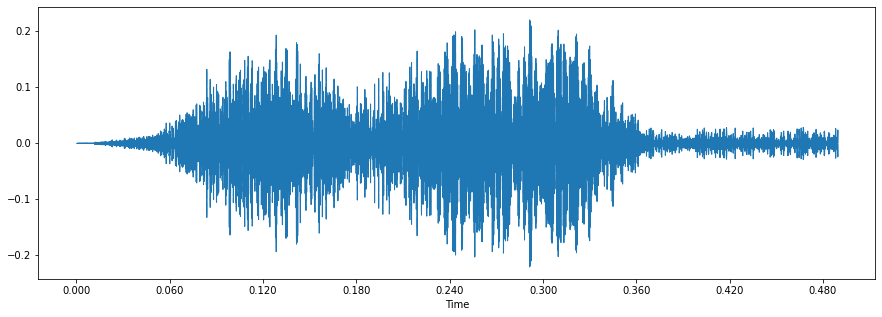

In [3]:
neg7 = "Shut Up/neg8.wav"
# Load files
data, sampling_rate = librosa.load(neg7)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(neg7)

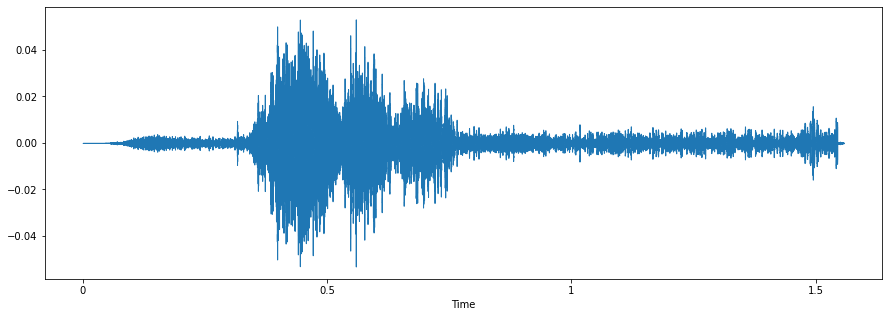

In [4]:
neutral1 = "Shut Up/neutral1.wav"
# Load files
data2, sampling_rate2 = librosa.load(neutral1)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data2, sr=sampling_rate2)

# Lets play the audio 
ipd.Audio(neutral1)

We can see this example is more neutral and calm. Also there is a lot of audio in the middle whereas start and end are just constant voice. So we might need to get read of those parts? So we realize from here that we need to clean the data. 

In [5]:
#Let's read the entire dataset. 

# Get the list of all files and directories
import os
pathShutUp ="Shut Up/"
pathAreYouKiddingMe ="Are you kidding me/"
pathAreYouSerious = "Are you serious/"

dir_list = [[],[],[]]

dir_list[0] = os.listdir(pathShutUp)
dir_list[1] = os.listdir(pathAreYouKiddingMe)
dir_list[2] = os.listdir(pathAreYouSerious)



files_lst = [[],[],[]]

files_lst[0] = [] #names of the files
files_lst[1] = []
files_lst[2] = []


label_lst = [[],[],[]]

label_lst[0] = [] # labels 
label_lst[1] = []
label_lst[2] = []

for i in range(0,3):
    for j in range(len(dir_list[i])):
        if '.wav' in dir_list[i][j]:
            files_lst[i].append(dir_list[i][j])
            if 'neg' in dir_list[i][j]:
                label_lst[i].append('negative')
            if 'neutral' in dir_list[i][j]:
                label_lst[i].append('neutral')
            if 'pos' in dir_list[i][j]:
                label_lst[i].append('positive')          

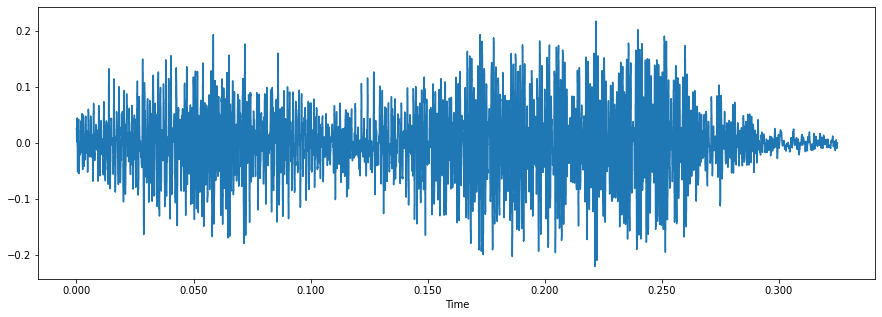

In [6]:
#Remove the silence in start and end of audio. 

neutral1 = "Shut Up/neg8.wav"
# Load files
data2, sampling_rate2 = librosa.load(neutral1)
data2 = librosa.effects.trim(data2, top_db= 10)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data2, sr=sampling_rate2)

In [46]:
#Karly's Feature Selection with SVM

from pydub import AudioSegment

#Feature Extraction


path_to_wav = [pathShutUp,pathAreYouKiddingMe,pathAreYouSerious]
list_KarlyFeatures = [[],[],[]]
X = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
y = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]

for i in range(0,3):
    channels_lst = []
    sample_width_lst = []
    rmse_lst = []
    chroma_stft_lst = []
    spec_cent_lst = []
    spec_bw_lst = []
    rolloff_lst = []
    zcr_lst = []
    mfcc_lst = []
    intensity_lst = []
    sample_width_lst = []
    frame_rate_lst = []
    frame_width_lst = []
    for j in range(len(files_lst[i])):
        file = path_to_wav[i] + files_lst[i][j]
        y, sr = librosa.load(file, mono=True, duration=30)
        audio_segment = AudioSegment.from_file(file)

        intensity = audio_segment.dBFS
        intensity_lst.append(intensity)

        rmse = librosa.feature.rms(y=y)
        rmse_lst.append(np.mean(rmse))

        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_stft_lst.append(np.mean(chroma_stft))

        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_cent_lst.append(np.mean(spec_cent))

        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        spec_bw_lst.append(np.mean(spec_bw))

        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        rolloff_lst.append(np.mean(rolloff))

        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_lst.append(np.mean(zcr))

        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        mfcc_lst.append(np.mean(mfcc))

        sample_width = audio_segment.sample_width
        sample_width_lst.append(sample_width)

        frame_rate = audio_segment.frame_rate
        frame_rate_lst.append(frame_rate)

        frame_width = audio_segment.frame_width
        frame_width_lst.append(frame_width)

    # dictionary of lists to create df
    dict = {'rmse' : rmse_lst,   'chroma_stft': chroma_stft_lst, 'spec_cent': spec_cent_lst,
            'spec_bw' : spec_bw_lst, 'rolloff': rolloff_lst, 'zcr': zcr_lst, 'mfcc': mfcc_lst,
            'intensity': intensity_lst  , 'frame_rate': frame_rate_lst ,
            'frame_width': frame_width_lst , 'sample_width': sample_width_lst, 
            'label' : label_lst[i]}
    list_KarlyFeatures[i]= pd.DataFrame(dict)

In [53]:
#Creating the models for Karly's Features - SVM


#container for all the models for all the phrases. 
container_Karly_SVM = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
confusion_matrices_Karly_SVM = [[],[],[]]


from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import seaborn as sns


for i in range(0,3):
    svm = SVC(kernel = 'poly')
    kf = StratifiedKFold(n_splits=5,shuffle = True, random_state= 42)

    accuracy_score_list = []
    recall_score_list = []
    precision_score_list = []
    f1_score_list = []
    results = []
    for train_index, test_index in kf.split(list_KarlyFeatures[i].iloc[:, 0:10], list_KarlyFeatures[i].iloc[:, -1]):
        X_train, X_test = list_KarlyFeatures[i].iloc[:, 0:10].iloc[train_index,:], list_KarlyFeatures[i].iloc[:, 0:10].iloc[test_index,:]
        y_train, y_test = list_KarlyFeatures[i].iloc[:, -1][train_index], list_KarlyFeatures[i].iloc[:, -1][test_index]
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred,average = 'weighted',zero_division=1))
        precision_score_list.append(precision_score(y_test, y_pred,average = 'weighted',zero_division=1))
        f1_score_list.append(f1_score(y_test, y_pred,average = 'weighted',zero_division=1))
        results.append(confusion_matrix(y_test, y_pred))
        
    container_Karly_SVM[i].loc["Accuracy","Karly's SVM"] = np.mean(accuracy_score_list)
    container_Karly_SVM[i].loc["Precision","Karly's SVM"] = np.mean(recall_score_list)
    container_Karly_SVM[i].loc["Recall","Karly's SVM"] = np.mean(precision_score_list)
    container_Karly_SVM[i].loc["F1_Score","Karly's SVM"] = np.mean(f1_score_list)
    ##Got the idea from here: https://stackoverflow.com/questions/19261747/sum-of-n-lists-element-wise-python
    confusion_matrices_Karly_SVM[i] = [sum(x) for x in zip(*results)]

Phrase Shut Up, Karly's SVM
           Karly's SVM
Accuracy      0.477778
Precision     0.477778
Recall        0.601235
F1_Score      0.379731


<AxesSubplot:>

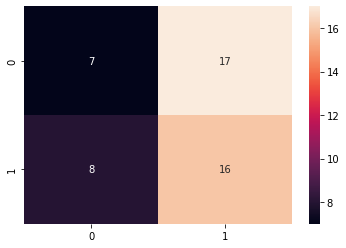

In [62]:
print("Phrase Shut Up, Karly's SVM")
print(container_Karly_SVM[0])
sns.heatmap(pd.DataFrame(confusion_matrices_Karly_SVM[0]),annot=True)

Phrase Are You Kidding Me , Karly's SVM
           Karly's SVM
Accuracy      0.432353
Precision     0.432353
Recall        0.754682
F1_Score      0.261083


<AxesSubplot:>

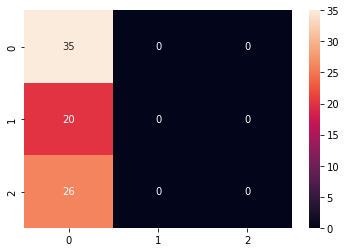

In [63]:
print("Phrase Are You Kidding Me , Karly's SVM")
print(container_Karly_SVM[1])
sns.heatmap(pd.DataFrame(confusion_matrices_Karly_SVM[1]),annot=True)

Phrase Are You Serious, Karly's SVM
           Karly's SVM
Accuracy      0.382353
Precision     0.382353
Recall        0.764057
F1_Score      0.211676


<AxesSubplot:>

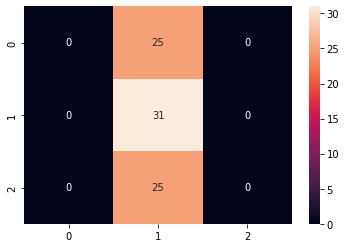

In [64]:
print("Phrase Are You Serious, Karly's SVM")
print(container_Karly_SVM[2])
sns.heatmap(pd.DataFrame(confusion_matrices_Karly_SVM[2]),annot=True)

In [58]:
#Karly's Decision Tree
#Creating the models for Karly's Features - Decision Tree


#container for all the models for all the phrases. 
container_Karly_DecTree = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
confusion_matrices_Karly_DecTree = [[],[],[]]


from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import seaborn as sns


for i in range(0,3):
    decTree = tree.DecisionTreeClassifier()
    kf = StratifiedKFold(n_splits=5,shuffle = True, random_state= 42)

    accuracy_score_list = []
    recall_score_list = []
    precision_score_list = []
    f1_score_list = []
    results = []
    for train_index, test_index in kf.split(list_KarlyFeatures[i].iloc[:, 0:10], list_KarlyFeatures[i].iloc[:, -1]):
        X_train, X_test = list_KarlyFeatures[i].iloc[:, 0:10].iloc[train_index,:], list_KarlyFeatures[i].iloc[:, 0:10].iloc[test_index,:]
        y_train, y_test = list_KarlyFeatures[i].iloc[:, -1][train_index], list_KarlyFeatures[i].iloc[:, -1][test_index]
        decTree.fit(X_train, y_train)
        y_pred = decTree.predict(X_test)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred,average = 'weighted',zero_division=1))
        precision_score_list.append(precision_score(y_test, y_pred,average = 'weighted',zero_division=1))
        f1_score_list.append(f1_score(y_test, y_pred,average = 'weighted',zero_division=1))
        results.append(confusion_matrix(y_test, y_pred))
        
    container_Karly_DecTree[i].loc["Accuracy","Karly's SVM"] = np.mean(accuracy_score_list)
    container_Karly_DecTree[i].loc["Precision","Karly's SVM"] = np.mean(recall_score_list)
    container_Karly_DecTree[i].loc["Recall","Karly's SVM"] = np.mean(precision_score_list)
    container_Karly_DecTree[i].loc["F1_Score","Karly's SVM"] = np.mean(f1_score_list)
    ##Got the idea from here: https://stackoverflow.com/questions/19261747/sum-of-n-lists-element-wise-python
    confusion_matrices_Karly_DecTree[i] = [sum(x) for x in zip(*results)]

Phrase Shut Up, Karly's Decision Tree
           Karly's SVM
Accuracy      0.557778
Precision     0.557778
Recall        0.619444
F1_Score      0.529222


<AxesSubplot:>

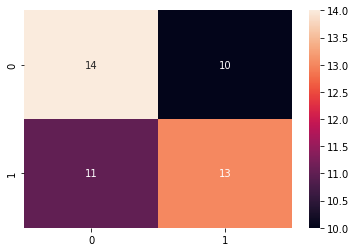

In [59]:
print("Phrase Shut Up, Karly's Decision Tree")
print(container_Karly_DecTree[0])
sns.heatmap(pd.DataFrame(confusion_matrices_Karly_DecTree[0]),annot=True)

Phrase Are You Kidding Me , Karly's Decision Tree
           Karly's SVM
Accuracy      0.383088
Precision     0.383088
Recall        0.413687
F1_Score      0.384570


<AxesSubplot:>

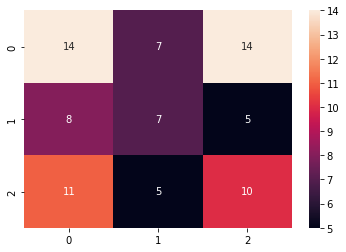

In [60]:
print("Phrase Are You Kidding Me , Karly's Decision Tree")
print(container_Karly_DecTree[1])
sns.heatmap(pd.DataFrame(confusion_matrices_Karly_DecTree[1]),annot=True)

Phrase Are You Serious, Karly's Decision
           Karly's SVM
Accuracy      0.333088
Precision     0.333088
Recall        0.346245
F1_Score      0.320216


<AxesSubplot:>

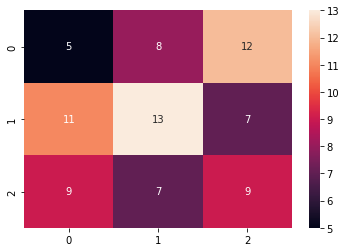

In [61]:
print("Phrase Are You Serious, Karly's Decision")
print(container_Karly_DecTree[2])
sns.heatmap(pd.DataFrame(confusion_matrices_Karly_DecTree[2]),annot=True)

In [7]:
#Homa's Feature Selection with SVM 

#Got the idea of using 13 MFCC features from here: https://www.kaggle.com/code/ejlok1/audio-emotion-part-2-feature-extract
import pandas as pd
import numpy as np


df = [pd.DataFrame(columns=['feature']),pd.DataFrame(columns=['feature']),pd.DataFrame(columns=['feature'])]
path_to_wav = [pathShutUp,pathAreYouKiddingMe,pathAreYouSerious]

#Feature extraction
for i in range(0,3):
    counter=0
    for j in range(len(files_lst[i])):
        file = path_to_wav[i] + files_lst[i][j]
        X, sr = librosa.load(file, mono=True, duration=30)
        #Remove the silence in start and end of audio. 
        X = librosa.effects.trim(X, top_db= 10)[0]
        sr = np.array(sr)
        # mean as the feature
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=13),axis=0)
        df[i].loc[counter] = [mfccs]
        counter=counter+1   

    # Now extract the mean bands to its own feature columns
    df[i] = pd.concat([pd.DataFrame(df[i]['feature'].values.tolist())],axis=1)
    # replace NA with 0
    df[i]=df[i].fillna(0)

In [67]:
X = df
y = label_lst

for i in range(0,3):
    #Let's change the labels to numbers to save ourselves from potential label errors in ML model later on. 
    for j in range(len(y[i])):
        if y[i][j] == 'negative':
            y[i][j] = -1
        if y[i][j] == 'neutral':
            y[i][j] = 0
        if y[i][j] == 'positive':
            y[i][j] = 1
    y[i] = pd.Series(y[i])
    # Let's do data normalization 
    mean = np.mean(X[i], axis=0)
    std = np.std(X[i], axis=0)
    X[i] = (X[i] - mean)/std

In [68]:
#Homa's Feature Selection with SVM 

#container for all the models for all the phrases. 
container = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
confusion_matrices = [[],[],[]]


from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import seaborn as sns


for i in range(0,3):
    svm = SVC(kernel = 'poly')
    kf = StratifiedKFold(n_splits=5,shuffle = True, random_state= 42)

    accuracy_score_list = []
    recall_score_list = []
    precision_score_list = []
    f1_score_list = []
    results = []
    for train_index, test_index in kf.split(X[i], y[i]):
        X_train, X_test = X[i].iloc[train_index,:], X[i].iloc[test_index,:]
        y_train, y_test = y[i][train_index], y[i][test_index]
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred,average = 'weighted',zero_division=1))
        precision_score_list.append(precision_score(y_test, y_pred,average = 'weighted',zero_division=1))
        f1_score_list.append(f1_score(y_test, y_pred,average = 'weighted',zero_division=1))
        results.append(confusion_matrix(y_test, y_pred))
        
    container[i].loc["Accuracy","Homa's SVM MFCC 13 Components"] = np.mean(accuracy_score_list)
    container[i].loc["Precision","Homa's SVM MFCC 13 Components"] = np.mean(recall_score_list)
    container[i].loc["Recall","Homa's SVM MFCC 13 Components"] = np.mean(precision_score_list)
    container[i].loc["F1_Score","Homa's SVM MFCC 13 Components"] = np.mean(f1_score_list)
    ##Got the idea from here: https://stackoverflow.com/questions/19261747/sum-of-n-lists-element-wise-python
    confusion_matrices[i] = [sum(x) for x in zip(*results)]

Phrase Shut Up, Homa's SVM
           Homa's SVM MFCC 13 Components
Accuracy                        0.544444
Precision                       0.544444
Recall                          0.718871
F1_Score                        0.429996


<AxesSubplot:>

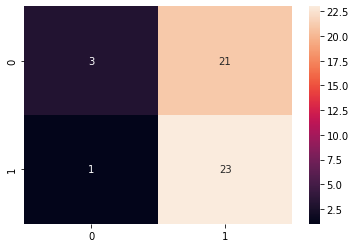

In [69]:
print("Phrase Shut Up, Homa's SVM")
print(container[0])
sns.heatmap(pd.DataFrame(confusion_matrices[0]),annot=True)

Phrase Are You Kidding Me , Homa's SVM
           Homa's SVM MFCC 13 Components
Accuracy                        0.456618
Precision                       0.456618
Recall                          0.671072
F1_Score                        0.308690


<AxesSubplot:>

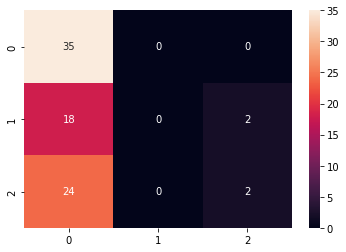

In [70]:
print("Phrase Are You Kidding Me , Homa's SVM")
print(container[1])
sns.heatmap(pd.DataFrame(confusion_matrices[1]),annot=True)

Phrase Are You Serious, Homa's SVM
           Homa's SVM MFCC 13 Components
Accuracy                        0.370588
Precision                       0.370588
Recall                          0.511193
F1_Score                        0.257506


<AxesSubplot:>

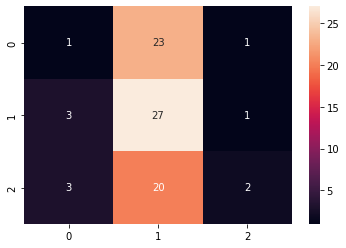

In [71]:
print("Phrase Are You Serious, Homa's SVM")
print(container[2])
sns.heatmap(pd.DataFrame(confusion_matrices[2]),annot=True)